In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Carga de los datos
datos = pd.read_csv("C:/Users/carlo/comprar_alquilar.csv")

In [3]:
# Escalado de los datos (excepto la columna objetivo)
scaler = StandardScaler()
df = datos.drop(['comprar'], axis=1)
X_Scaled = scaler.fit_transform(df)

In [4]:
# Aplicación de PCA para 9 componentes principales
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_Scaled)

In [5]:
# Porcentaje de varianza explicada por cada componente
expl = pca.explained_variance_ratio_
print("Porcentaje de varianza por componente", X_pca.shape)
print(expl)
print("Suma:", sum(expl[0:5]))

Porcentaje de varianza por componente (202, 9)
[0.29913557 0.23294923 0.11711241 0.10685622 0.09635279 0.05629866
 0.04145579 0.03017819 0.01966115]
Suma: 0.852406211771431


In [6]:
# Creación de DataFrame con los componentes principales
principal_columns = [f'Principal Component {i+1}' for i in range(X_pca.shape[1])]
principal_df = pd.DataFrame(data=X_pca, columns=principal_columns)

In [7]:
# Agregar la columna objetivo al DataFrame
principal_df['comprar'] = datos['comprar']

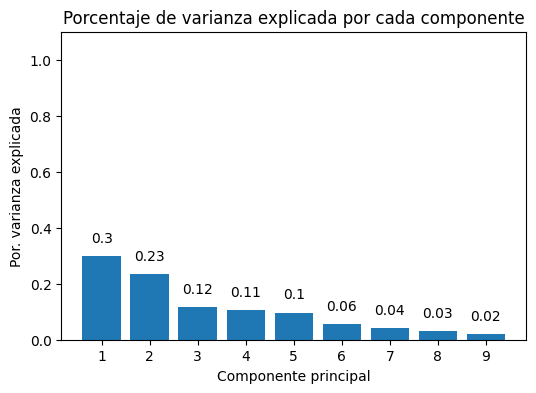

In [8]:
# Gráfica: Porcentaje de varianza explicada por cada componente
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(x=np.arange(pca.n_components_) + 1, height=pca.explained_variance_ratio_)

for x, y in zip(np.arange(pca.n_components_) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada')
plt.show()

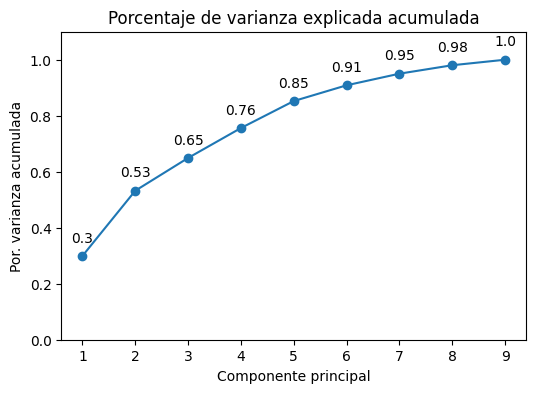

In [9]:
# Gráfica: Porcentaje de varianza explicada acumulada
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(np.arange(pca.n_components_) + 1, prop_varianza_acum, marker='o')

for x, y in zip(np.arange(pca.n_components_) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')
plt.show()

In [10]:
# Repetición del proceso excluyendo algunas columnas
df2 = datos.drop(['comprar', 'estado_civil', 'hijos', 'trabajo'], axis=1)
X_Scaled2 = scaler.fit_transform(df2)

In [11]:
# PCA para 6 componentes principales
pca2 = PCA(n_components=6)
X_pca2 = pca2.fit_transform(X_Scaled2)

In [12]:
# Porcentaje de varianza explicada por cada componente
expl2 = pca2.explained_variance_ratio_
print("Porcentaje de varianza por componente", X_pca2.shape)
print(expl2)
print("Suma:", sum(expl2[0:5]))

Porcentaje de varianza por componente (202, 6)
[0.42698481 0.17213415 0.16027137 0.14392002 0.06685229 0.02983737]
Suma: 0.9701626349890448


In [13]:
# Creación de DataFrame con los componentes principales
principal_columns2 = [f'Principal Component {i+1}' for i in range(X_pca2.shape[1])]
principal_df2 = pd.DataFrame(data=X_pca2, columns=principal_columns2)

In [14]:
# Agregar la columna objetivo al DataFrame
principal_df2['comprar'] = datos['comprar']

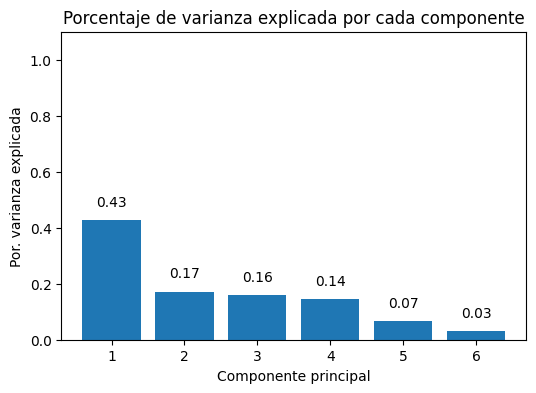

In [15]:
# Gráfica: Porcentaje de varianza explicada por cada componente
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(x=np.arange(pca2.n_components_) + 1, height=pca2.explained_variance_ratio_)

for x, y in zip(np.arange(pca2.n_components_) + 1, pca2.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

ax.set_xticks(np.arange(pca2.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada')
plt.show()

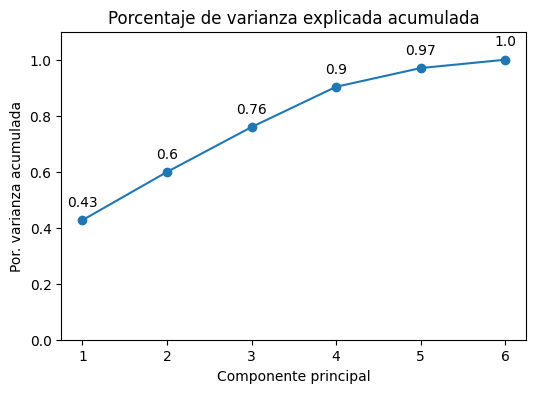

In [16]:
# Gráfica: Porcentaje de varianza explicada acumulada
prop_varianza_acum2 = pca2.explained_variance_ratio_.cumsum()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(np.arange(pca2.n_components_) + 1, prop_varianza_acum2, marker='o')

for x, y in zip(np.arange(pca2.n_components_) + 1, prop_varianza_acum2):
    label = round(y, 2)
    ax.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca2.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')
plt.show()

In [17]:
# Guardar los DataFrames con los componentes principales en CSV
principal_df.to_csv('datosobtenidosreduccion_9componentes.csv', index=False)
principal_df2.to_csv('datosobtenidosreduccion_6componentes.csv', index=False)